# Unconstraint Multi-Objective

In [44]:
%run default.ipynb

## Load the Benchmark

In [48]:
name = "ucmo"

benchmark = get_benchmark(name)

# the folder where the data should be written to or loaded from
FOLDER = join(ROOT, "data", name)

# the loader for file that have been already saved
LOADER = DefaultLoader(FOLDER)

# the file writer to store the runs
WRITER = DefaultWriter(FOLDER)

# -----------------------------------------------------
# RUN (or load if data already available)
# -----------------------------------------------------

results = benchmark.run(writer=WRITER,
                        loader=LOADER,
                        run_if_loading_fails=False,
                        exception_if_not_available=True,
                        verbose=False)


In [49]:
from benchmark.analyzer.moo import MultiObjectiveAnalyzer
MultiObjectiveAnalyzer().run(results, benchmark=benchmark, inplace=True)
print("DONE")

DONE


In [50]:
df = pd.DataFrame(results, columns=["problem", "algorithm", "run", "igd"])

In [51]:
df.to_pickle("ucmo.pkl")

In [52]:
df = pd.read_pickle("ucmo.pkl")

## YOU CAN START FROM HERE

In [53]:
df

,problem,algorithm,run,igd
0,kur,nsga2,1,0.003899
1,kur,nsga2,2,0.003906
2,kur,nsga2,3,0.004118
3,kur,nsga2,4,0.004212
4,kur,nsga2,5,0.004282
...,...,...,...,...
863,zdt6,nsga3,27,0.043132
864,zdt6,nsga3,28,0.030646
865,zdt6,nsga3,29,0.035926
866,zdt6,nsga3,30,0.035624


++++++++++++++++++++++++++++++++++++++++
kur
++++++++++++++++++++++++++++++++++++++++
                igd                                        
             median       min       max      mean       std
algorithm                                                  
gde3       0.003997  0.003613  0.004809  0.004052  0.000236
moead      0.004705  0.004413  0.006003  0.004805  0.000303
nsga2      0.004138  0.003777  0.004484  0.004124  0.000205
nsga3      0.004208  0.004018  0.004405  0.004222  0.000094


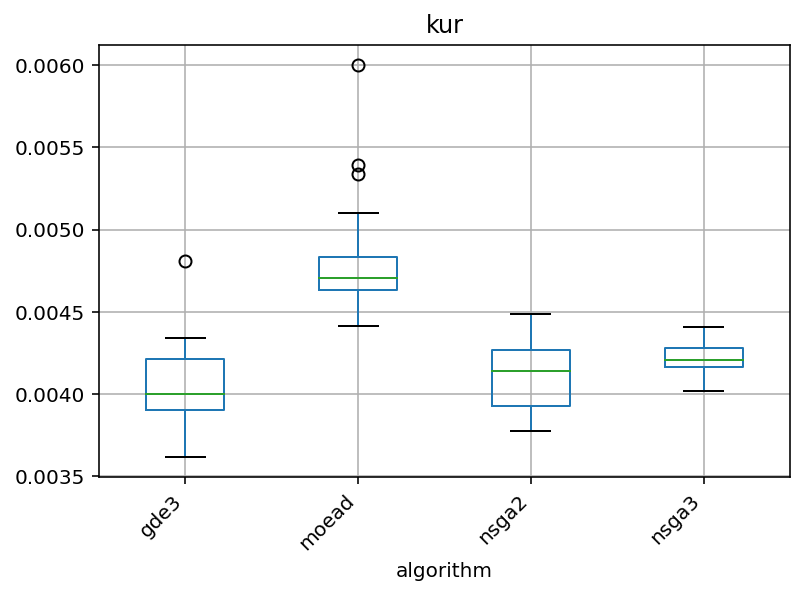


++++++++++++++++++++++++++++++++++++++++
wfg1
++++++++++++++++++++++++++++++++++++++++
                igd                                        
             median       min       max      mean       std
algorithm                                                  
gde3       0.421994  0.402934  0.469272  0.426603  0.015760
moead      0.394589  0.373675  0.555006  0.400073  0.031618
nsga2      0.317497  0.285286  0.499604  0.345355  0.071734
nsga3      0.563844  0.323951  0.617127  0.557109  0.050882


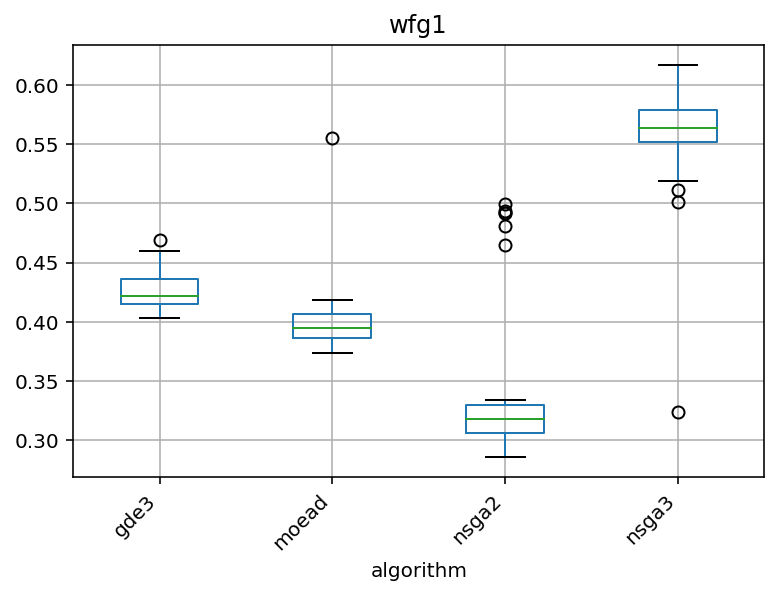


++++++++++++++++++++++++++++++++++++++++
zdt1
++++++++++++++++++++++++++++++++++++++++
                igd                                        
             median       min       max      mean       std
algorithm                                                  
gde3       0.013123  0.007606  0.026411  0.013996  0.004507
moead      0.005129  0.003919  0.021132  0.006494  0.003776
nsga2      0.005149  0.004586  0.005859  0.005146  0.000290
nsga3      0.004638  0.004199  0.005402  0.004634  0.000247


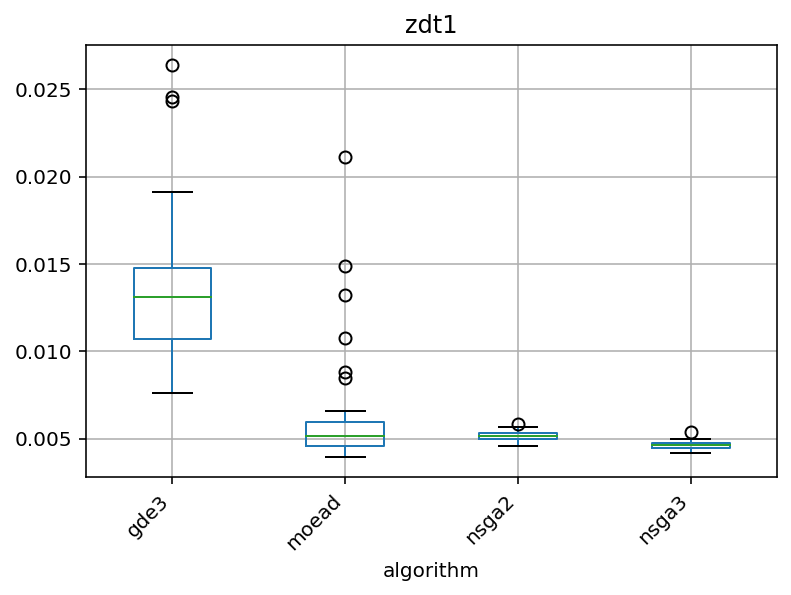


++++++++++++++++++++++++++++++++++++++++
zdt2
++++++++++++++++++++++++++++++++++++++++
                igd                                        
             median       min       max      mean       std
algorithm                                                  
gde3       0.015415  0.007550  0.394119  0.034597  0.072836
moead      0.004542  0.003623  0.120277  0.011171  0.022642
nsga2      0.005278  0.004542  0.005887  0.005357  0.000303
nsga3      0.005352  0.004513  0.080544  0.012870  0.020774


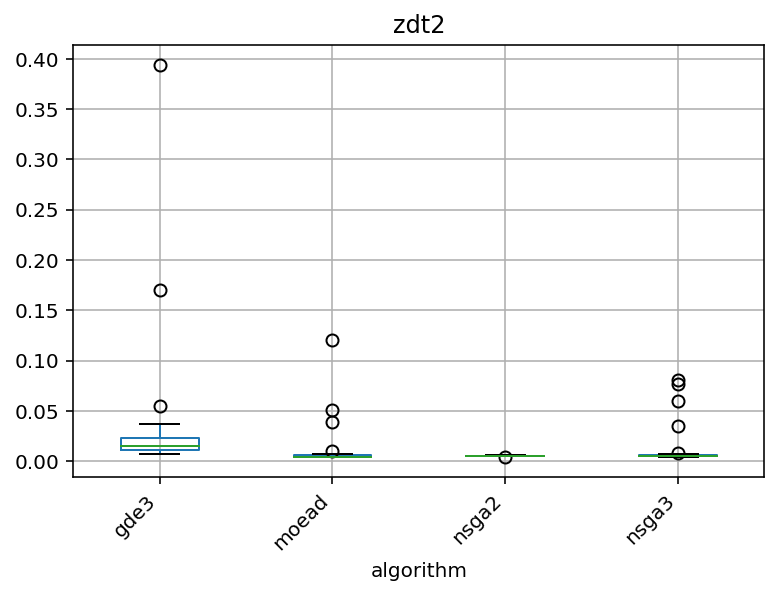


++++++++++++++++++++++++++++++++++++++++
zdt3
++++++++++++++++++++++++++++++++++++++++
                igd                                        
             median       min       max      mean       std
algorithm                                                  
gde3       0.013325  0.007121  0.020348  0.013279  0.003562
moead      0.006229  0.005366  0.161510  0.017672  0.031432
nsga2      0.003484  0.002910  0.052433  0.006368  0.011314
nsga3      0.004072  0.003796  0.053078  0.005637  0.008806


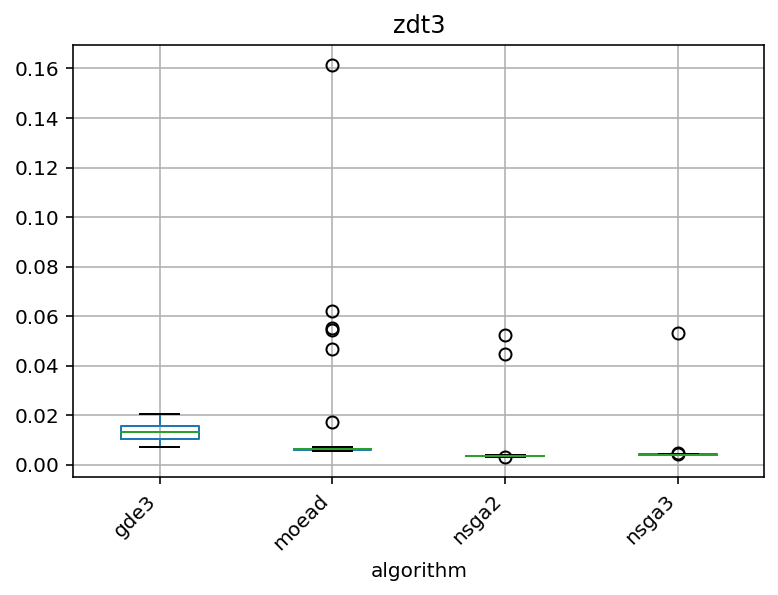


++++++++++++++++++++++++++++++++++++++++
zdt4
++++++++++++++++++++++++++++++++++++++++
                igd                                         
             median       min        max      mean       std
algorithm                                                   
gde3       5.920764  3.606017  12.460879  5.911808  1.828027
moead      0.015021  0.006149   0.048570  0.016860  0.009011
nsga2      0.008891  0.005297   0.075225  0.012354  0.012513
nsga3      0.044036  0.006697   0.178133  0.056934  0.044442


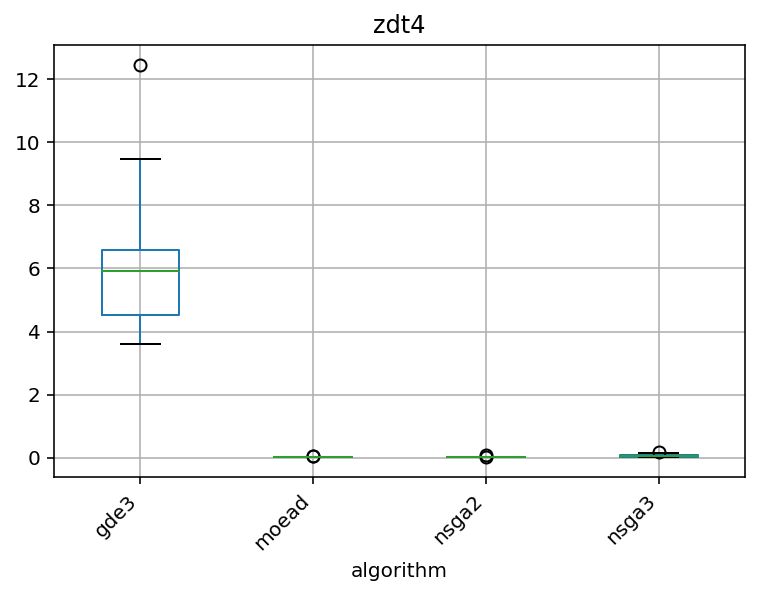


++++++++++++++++++++++++++++++++++++++++
zdt6
++++++++++++++++++++++++++++++++++++++++
                igd                                        
             median       min       max      mean       std
algorithm                                                  
gde3       0.071530  0.040992  0.111771  0.073364  0.019469
moead      0.003819  0.003695  0.003898  0.003820  0.000051
nsga2      0.014908  0.004502  0.026525  0.014145  0.006721
nsga3      0.033628  0.026550  0.043132  0.033894  0.003884


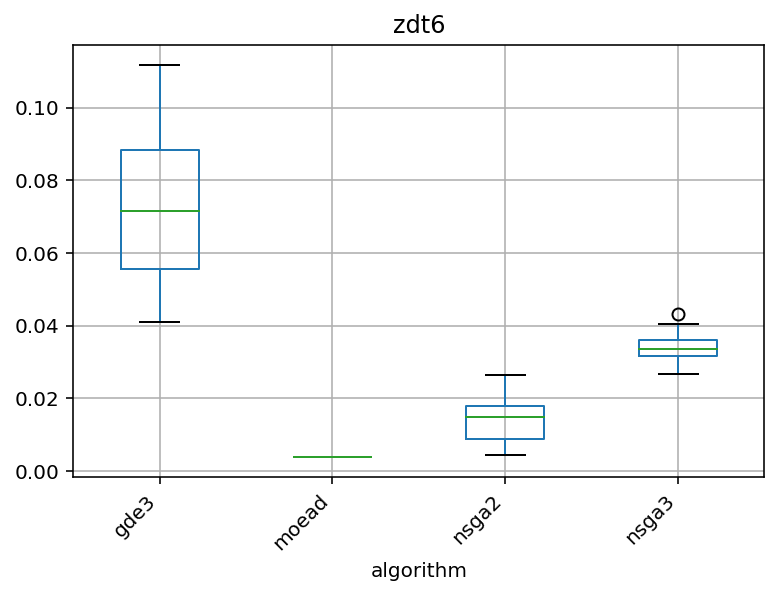

In [68]:
metric = 'igd'

problems = df['problem'].unique()

for name in problems:
    
    print("++++++++++++++++++++++++++++++++++++++++")
    print(name)
    print("++++++++++++++++++++++++++++++++++++++++")
    
    _df = df[df['problem'] == name]
    val = _df.groupby(['algorithm']).agg({metric: ['median', 'min','max','mean', 'std']})
    print(val)
    
    
    _df.boxplot(column=metric, by='algorithm')
    plt.title(name)
    plt.xticks(rotation=45, ha='right')
    plt.suptitle("")
    plt.show()

    print()

array(['kur', 'wfg1', 'zdt1', 'zdt2', 'zdt3', 'zdt4', 'zdt6'],
      dtype=object)